In [1]:
import os
import cv2
import tqdm
import time
import itertools
import numpy as np
from math import ceil
from itertools import chain
from tqdm.contrib import tzip
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

In [3]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True' ## also i can install nomkl
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [4]:
%run ./data_utils.ipynb
%run ./segnet_model.ipynb

In [5]:
BATCH_SIZE = 12
NUM_INPUT_CHANNELS = 3
NUM_OUTPUT_CHANNELS = 32
NUM_CLASSES = 32
NUM_EPOCHS = 60
LEARNING_RATE = 0.04
MOMENTUM = 0.9

In [6]:
transform = T.Compose([
            T.ToPILImage(),
            T.ToTensor(),
            T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])

Images size: (720, 960, 3)


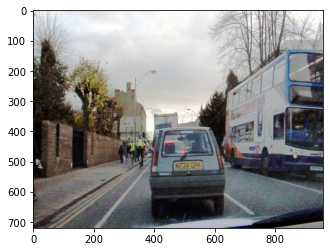

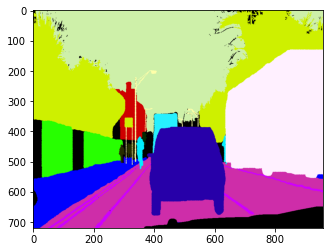

  0%|          | 0/702 [00:00<?, ?it/s]

data size:	 700 700
X_train:	training images shape	 406 (210, 280, 3)
X_test:		test images shape	 294 (210, 280, 3)
Y_train:	training labels shape	 406 (210, 280)
Y_test:		test labels shape	 294 (210, 280)


In [7]:
data_reader = Data_reader(DATA_PATH = '../../data/part_A/camvid/')
X_train, X_test, Y_train, Y_test = data_reader.load_data(data_shape_log = True)

In [8]:
train_data = CamvidDataset(X_train, Y_train, transform = transform)
test_data = CamvidDataset(X_test[:30], Y_test[:30], transform = transform)
eval_data = CamvidDataset(X_test[30:], Y_test[30:], transform = transform)

print('train set:\t', len(train_data))
print('test set:\t', len(test_data))
print('eval set:\t', len(eval_data))

train set:	 406
test set:	 30
eval set:	 264


In [9]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 10, shuffle=True, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_data, shuffle = False)

batch of images shape torch.Size([10, 3, 210, 280])
batch of labels shape torch.Size([10, 210, 280])


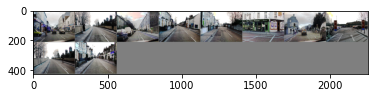

In [10]:
dataiter = iter(train_loader)
images, label = dataiter.next()
print('batch of images shape', images.shape)
print('batch of labels shape', label.shape)
imshow(torchvision.utils.make_grid(images))

Model With Batch Norm

In [11]:
model = SegNetBase(NUM_INPUT_CHANNELS, NUM_OUTPUT_CHANNELS)

c = data_reader.labels_probability()
c[c < 1e-7] = 1e-7
class_weights = 1.0/c
criterion = torch.nn.CrossEntropyLoss(weight = class_weights)

optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum = MOMENTUM)

In [12]:
losses, t_losses = train(model, train_loader, criterion, optimizer, NUM_EPOCHS = NUM_EPOCHS, load = False)

Epochs:	 60
batch loss: 3.453852415084839
batch loss: 3.479247570037842
batch loss: 3.47261381149292
batch loss: 3.4578678607940674
batch loss: 3.4439873695373535
batch loss: 3.4975380897521973
batch loss: 3.4651544094085693
batch loss: 3.4643197059631348
batch loss: 3.452711820602417
batch loss: 3.468301296234131
batch loss: 3.4609827995300293
batch loss: 3.4629011154174805
batch loss: 3.4874649047851562
batch loss: 3.469968318939209
batch loss: 3.4485011100769043
batch loss: 3.4648425579071045
batch loss: 3.4460830688476562
batch loss: 3.433884382247925
batch loss: 3.447254180908203
batch loss: 3.433011293411255
batch loss: 3.4327986240386963
batch loss: 3.4711415767669678
batch loss: 3.4124703407287598
batch loss: 3.4267492294311523
batch loss: 3.4299862384796143
batch loss: 3.440534830093384
batch loss: 3.4642183780670166
batch loss: 3.4772167205810547
batch loss: 3.3943288326263428
batch loss: 3.3870952129364014
batch loss: 3.4735279083251953
batch loss: 3.380856990814209
batch lo

batch loss: 2.9172191619873047
batch loss: 2.7908053398132324
batch loss: 2.8383243083953857
batch loss: 3.2023749351501465
batch loss: 2.8086018562316895
batch loss: 2.9105429649353027
batch loss: 2.692352056503296
batch loss: 3.0977783203125
batch loss: 2.7967605590820312
batch loss: 2.965834856033325
batch loss: 2.1148805618286133
batch loss: 2.7772135734558105
batch loss: 2.849029779434204
batch loss: 2.714970827102661
batch loss: 2.7944540977478027
batch loss: 2.77642822265625
batch loss: 2.859349250793457
batch loss: 2.956749677658081
batch loss: 2.794731616973877
batch loss: 2.8277196884155273
batch loss: 2.694469690322876
batch loss: 2.4299988746643066
batch loss: 2.4903533458709717
batch loss: 2.7818846702575684
batch loss: 2.7327756881713867
batch loss: 2.7463274002075195
batch loss: 2.690474271774292
batch loss: 2.9797239303588867
batch loss: 3.1596646308898926
batch loss: 2.945375919342041
batch loss: 2.9825057983398438
batch loss: 2.990673780441284
batch loss: 2.8976922035

batch loss: 2.081252336502075
batch loss: 2.4634077548980713
batch loss: 2.900952100753784
batch loss: 2.1348650455474854
batch loss: 2.279881715774536
batch loss: 2.2558910846710205
batch loss: 2.634627103805542
batch loss: 2.181713342666626
batch loss: 1.9609049558639526
batch loss: 2.343416690826416
batch loss: 2.168698787689209
batch loss: 2.4268009662628174
batch loss: 2.3975536823272705
batch loss: 2.2934439182281494
batch loss: 1.9909120798110962
batch loss: 2.2739531993865967
batch loss: 1.7709931135177612
batch loss: 2.489537000656128
batch loss: 2.4160425662994385
batch loss: 2.006699323654175
batch loss: 1.9071919918060303
batch loss: 2.174926519393921
batch loss: 1.7609961032867432
batch loss: 1.727317214012146
Epoch #13	train loss: 2.25234982	test loss: 2.10740590	 Time: 655.574417s
batch loss: 1.883821725845337
batch loss: 2.517080307006836
batch loss: 2.730419397354126
batch loss: 2.2501509189605713
batch loss: 2.3499937057495117
batch loss: 2.1228384971618652
batch loss

batch loss: 1.5823557376861572
batch loss: 1.757197618484497
batch loss: 1.5898476839065552
batch loss: 1.8954830169677734
batch loss: 1.8907265663146973
batch loss: 1.9844127893447876
batch loss: 1.833261251449585
batch loss: 1.8376314640045166
batch loss: 1.5668039321899414
batch loss: 2.5930070877075195
batch loss: 1.5124340057373047
batch loss: 1.884128212928772
batch loss: 1.5480482578277588
batch loss: 2.7855842113494873
batch loss: 1.497618556022644
batch loss: 1.943276286125183
Epoch #19	train loss: 1.87615695	test loss: 1.78078806	 Time: 652.866541s
batch loss: 1.7421568632125854
batch loss: 1.8331522941589355
batch loss: 1.3827065229415894
batch loss: 1.6101971864700317
batch loss: 1.6680935621261597
batch loss: 1.936516284942627
batch loss: 1.7849515676498413
batch loss: 1.7579890489578247
batch loss: 1.5935243368148804
batch loss: 1.7904422283172607
batch loss: 1.852216124534607
batch loss: 1.9104598760604858
batch loss: 2.7258756160736084
batch loss: 1.8003896474838257
bat

batch loss: 1.498091697692871
batch loss: 1.5603866577148438
batch loss: 1.7564713954925537
batch loss: 1.6896675825119019
batch loss: 1.6831494569778442
batch loss: 1.6001265048980713
batch loss: 1.4902427196502686
batch loss: 1.2608402967453003
batch loss: 1.3800098896026611
batch loss: 1.658904790878296
Epoch #25	train loss: 1.59037123	test loss: 1.56227100	 Time: 652.384890s
batch loss: 1.2975236177444458
batch loss: 1.4068007469177246
batch loss: 1.5083136558532715
batch loss: 1.2938060760498047
batch loss: 1.6262445449829102
batch loss: 1.5117130279541016
batch loss: 1.3818353414535522
batch loss: 1.94000244140625
batch loss: 2.5183768272399902
batch loss: 1.185279369354248
batch loss: 1.4000989198684692
batch loss: 1.4002360105514526
batch loss: 1.0151615142822266
batch loss: 1.6116880178451538
batch loss: 1.436118483543396
batch loss: 1.4857221841812134
batch loss: 1.3793174028396606
batch loss: 1.6265403032302856
batch loss: 2.5756444931030273
batch loss: 1.6182947158813477
ba

batch loss: 1.3365051746368408
batch loss: 1.334604263305664
batch loss: 1.3726812601089478
batch loss: 1.3646876811981201
Epoch #31	train loss: 1.41498289	test loss: 1.42556000	 Time: 655.636656s
batch loss: 1.6580251455307007
batch loss: 1.2950359582901
batch loss: 1.1855956315994263
batch loss: 1.3977293968200684
batch loss: 2.271634101867676
batch loss: 1.3826910257339478
batch loss: 1.2143036127090454
batch loss: 1.3678637742996216
batch loss: 1.3094724416732788
batch loss: 1.293665885925293
batch loss: 1.4487875699996948
batch loss: 1.3102306127548218
batch loss: 1.7195788621902466
batch loss: 1.149735689163208
batch loss: 1.1594525575637817
batch loss: 1.3105381727218628
batch loss: 1.6525408029556274
batch loss: 1.2523428201675415
batch loss: 1.119767189025879
batch loss: 1.2010889053344727
batch loss: 1.2451128959655762
batch loss: 1.9661433696746826
batch loss: 1.491687297821045
batch loss: 1.273125410079956
batch loss: 1.1837671995162964
batch loss: 1.327721118927002
batch l

batch loss: 1.3063380718231201
batch loss: 2.204515218734741
batch loss: 1.6979656219482422
batch loss: 1.1588656902313232
batch loss: 1.2442768812179565
batch loss: 1.2069756984710693
batch loss: 1.2998018264770508
batch loss: 1.216367244720459
batch loss: 1.331771731376648
batch loss: 1.287753939628601
batch loss: 1.2652430534362793
batch loss: 1.2944377660751343
batch loss: 1.243004560470581
batch loss: 1.8570361137390137
batch loss: 1.1415265798568726
batch loss: 1.441972017288208
batch loss: 1.1022467613220215
batch loss: 1.2904835939407349
batch loss: 1.4230595827102661
batch loss: 1.165342926979065
batch loss: 1.2141001224517822
batch loss: 1.060652732849121
batch loss: 1.1968306303024292
batch loss: 1.171305775642395
batch loss: 1.3263282775878906
batch loss: 1.2745834589004517
batch loss: 2.1672141551971436
batch loss: 1.4088376760482788
batch loss: 1.2943202257156372
batch loss: 1.1360700130462646
batch loss: 1.4581613540649414
batch loss: 1.2074249982833862
batch loss: 1.385

batch loss: 1.1665598154067993
batch loss: 1.6168386936187744
batch loss: 1.1616499423980713
batch loss: 1.108127474784851
batch loss: 1.1564034223556519
batch loss: 1.1169151067733765
batch loss: 1.1802775859832764
batch loss: 1.115727424621582
batch loss: 0.9778717756271362
batch loss: 1.1137323379516602
batch loss: 1.1723579168319702
batch loss: 1.1639877557754517
batch loss: 1.3525017499923706
batch loss: 1.514893651008606
batch loss: 2.1160547733306885
batch loss: 1.3872063159942627
batch loss: 1.159639835357666
batch loss: 1.91169273853302
batch loss: 1.9857211112976074
batch loss: 1.1224011182785034
batch loss: 1.1263614892959595
batch loss: 1.2758711576461792
batch loss: 1.2484995126724243
batch loss: 0.9205355644226074
batch loss: 0.9813776016235352
batch loss: 1.90822172164917
batch loss: 1.1401159763336182
batch loss: 1.1571086645126343
batch loss: 0.9480807781219482
batch loss: 1.1040775775909424
batch loss: 1.1019270420074463
batch loss: 1.1413389444351196
batch loss: 1.28

batch loss: 1.069275975227356
batch loss: 1.136128306388855
batch loss: 0.9123576879501343
batch loss: 0.9957622289657593
batch loss: 1.1359456777572632
batch loss: 1.3510550260543823
batch loss: 1.7675470113754272
batch loss: 1.0678132772445679
batch loss: 1.0650349855422974
batch loss: 0.9600679278373718
batch loss: 0.9528642296791077
batch loss: 1.1224454641342163
batch loss: 1.161920428276062
batch loss: 1.0231270790100098
batch loss: 1.3627865314483643
batch loss: 1.0258722305297852
batch loss: 1.019377589225769
batch loss: 1.525663137435913
batch loss: 2.239260196685791
batch loss: 1.1292966604232788
batch loss: 1.9120852947235107
batch loss: 1.4596760272979736
batch loss: 1.0764374732971191
batch loss: 0.6883542537689209
batch loss: 1.29258131980896
batch loss: 1.1629430055618286
batch loss: 1.222525954246521
Epoch #50	train loss: 1.19762157	test loss: 1.15887058	 Time: 653.235840s
batch loss: 1.1029218435287476
batch loss: 0.8298673629760742
batch loss: 0.9863470196723938
batch

batch loss: 1.792263150215149
batch loss: 1.391943097114563
batch loss: 1.0627280473709106
batch loss: 1.076385498046875
batch loss: 0.9904873371124268
batch loss: 1.1765269041061401
batch loss: 1.0882773399353027
batch loss: 0.7912483215332031
batch loss: 1.6666150093078613
batch loss: 1.0126118659973145
batch loss: 1.1761418581008911
batch loss: 1.083763837814331
batch loss: 1.027600884437561
batch loss: 1.1794451475143433
batch loss: 1.5623862743377686
batch loss: 1.5494953393936157
batch loss: 1.333790898323059
batch loss: 1.174173355102539
batch loss: 1.1853530406951904
batch loss: 1.1290736198425293
batch loss: 1.3575834035873413
Epoch #56	train loss: 1.17944052	test loss: 1.14499092	 Time: 5804.715570s
batch loss: 1.3850101232528687
batch loss: 0.9667088389396667
batch loss: 1.1239737272262573
batch loss: 1.1220152378082275
batch loss: 1.753906011581421
batch loss: 1.0570788383483887
batch loss: 1.0561374425888062
batch loss: 1.2795839309692383
batch loss: 1.0788224935531616
bat

In [13]:
#losses2, t_losses2 = train(None, train_loader, criterion, optimizer, NUM_EPOCHS = 20, log = True, load = True)

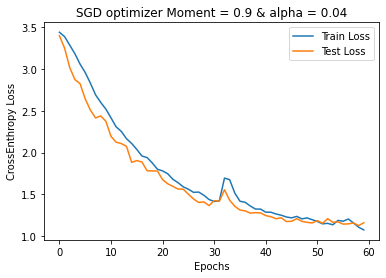

In [50]:
plt.plot([i for i in range(len(losses))], losses, label='Train Loss')
plt.plot([i for i in range(len(losses))], t_losses, label = 'Test Loss')
plt.xlabel('Epochs')
plt.ylabel('CrossEnthropy Loss')
plt.title('SGD optimizer Moment = 0.9 & alpha = 0.04')
plt.legend()

plt.savefig('./saved_images/losswithBN.png', dpi = 400)

In [83]:
train_loader0 = torch.utils.data.DataLoader(train_data, batch_size = 1, shuffle=True, pin_memory=True)
imagesTrain, labelsTrain, resultsTrain, correctnessesTrain = val(train_loader0, model_path = './model_best.pth')

In [84]:
imagesTest, labelsTest, resultsTest, correctnessesTest = val(test_loader, model_path = './model_best.pth')

Evaluating the method on train data:
Correctness:	 0.8699763


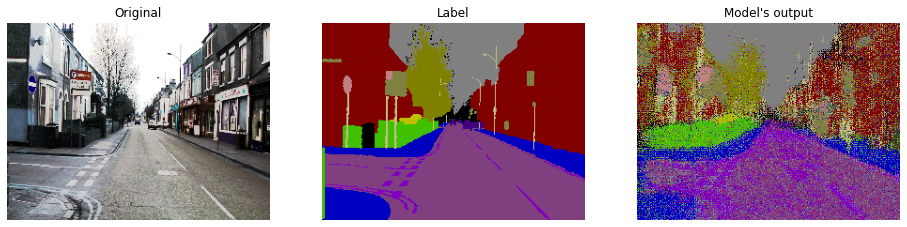

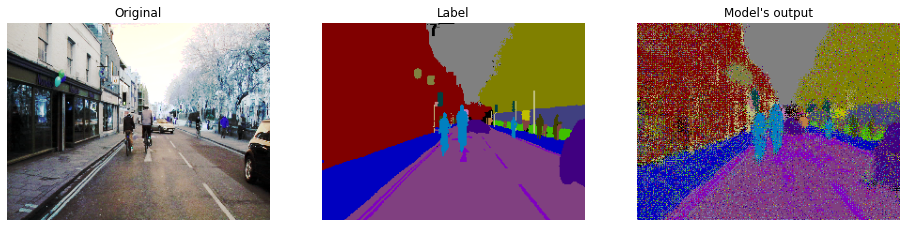

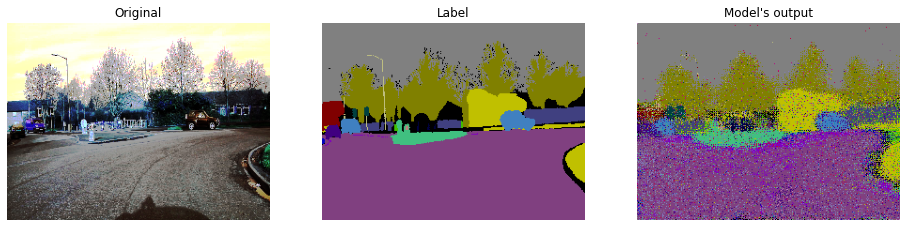

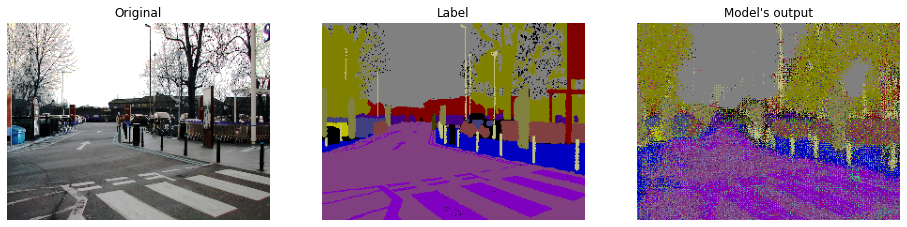

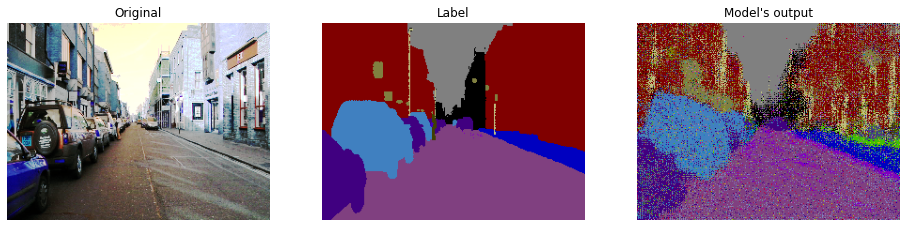

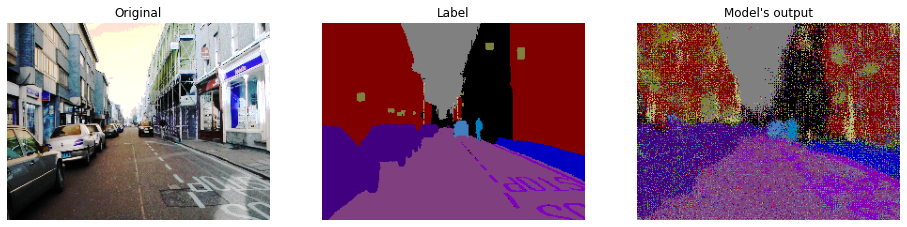

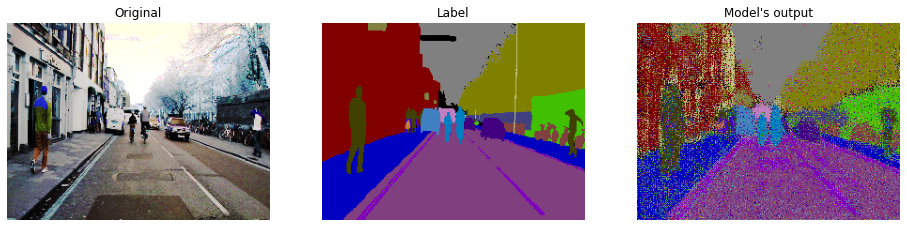

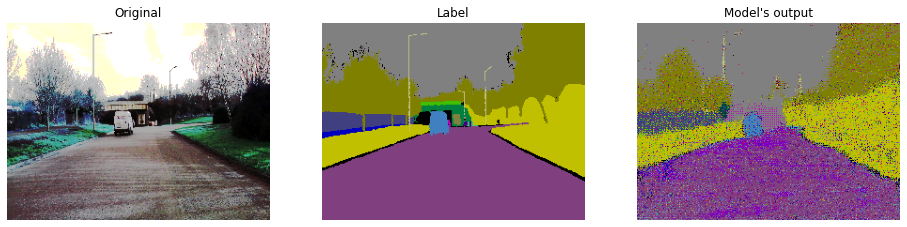

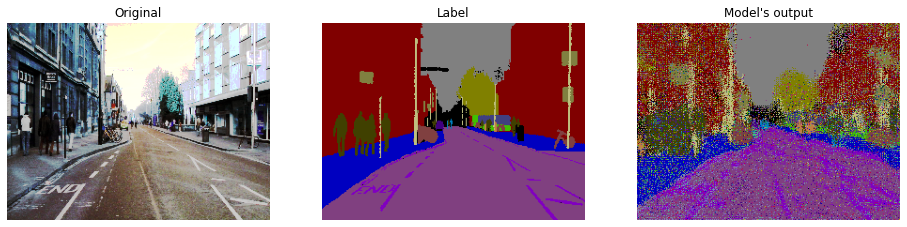

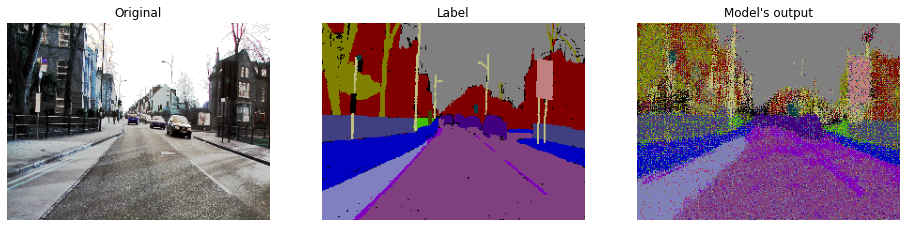

In [95]:
print('Evaluating the method on train data:')
print('Correctness:\t', np.array(correctnessesTrain).mean())

for i in range(10):
    
    fig = plt.figure(figsize=(16, 10))
    ax1 = fig.add_subplot(2, 3, 1)
    ax1.axis("off")
    ax1.title.set_text('Original')
    ax2 = fig.add_subplot(2, 3, 2)
    ax2.axis("off")
    ax2.title.set_text("Label")
    ax3 = fig.add_subplot(2, 3, 3)
    ax3.axis("off")
    ax3.title.set_text("Model's output")

    ax1.imshow(np.transpose(imagesTrain[i][0]/ 2 + 0.5, (1, 2, 0)), cmap=None)
    ax2.imshow(data_reader.rev_translate(np.array([labelsTrain[i]])), cmap=None)
    ax3.imshow(resultsTrain[i], cmap=None)
    plt.show()
#     fig.savefig('./saved_images/equalizeHistnorm.png', dpi=100)

Evaluating the method on test data:
Correctness:	 0.85358006


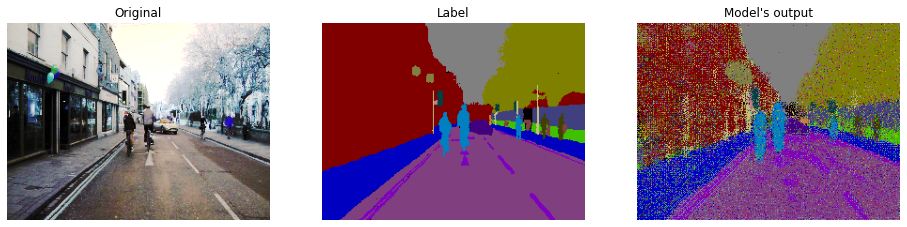

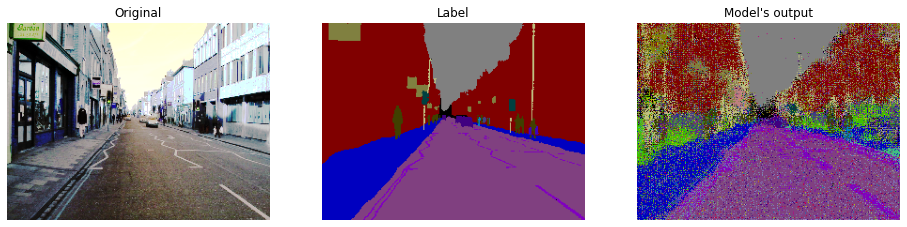

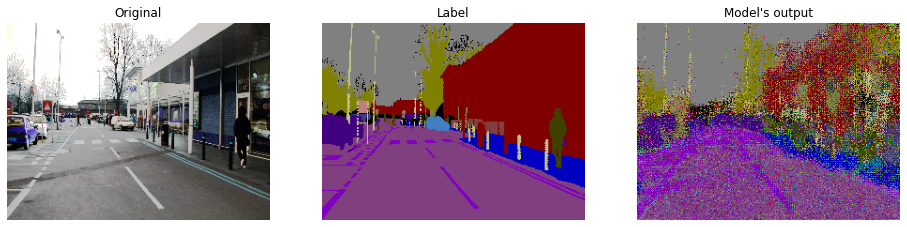

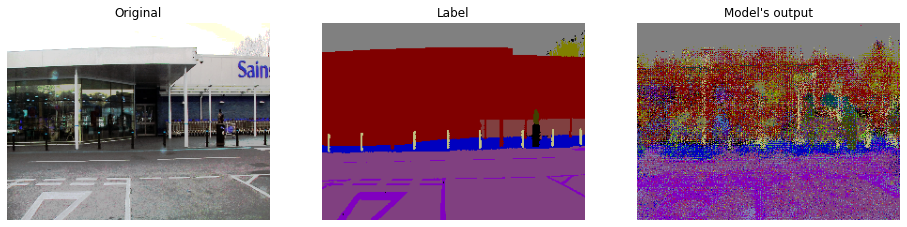

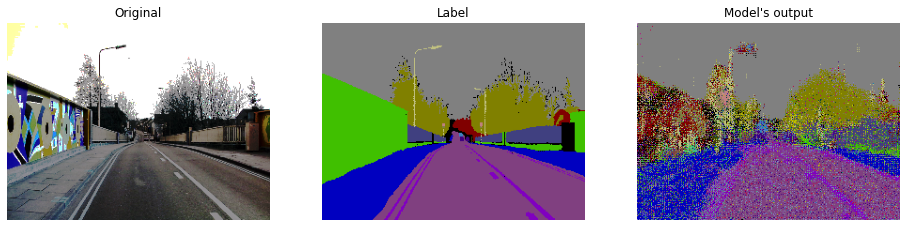

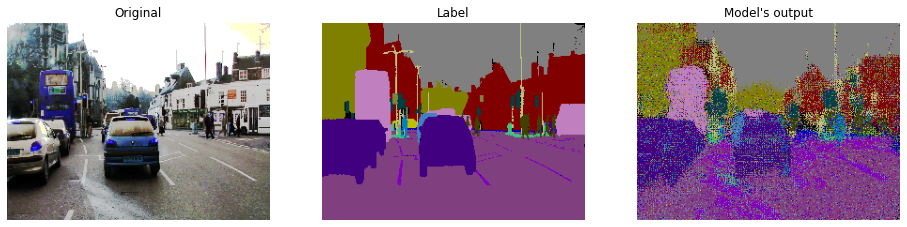

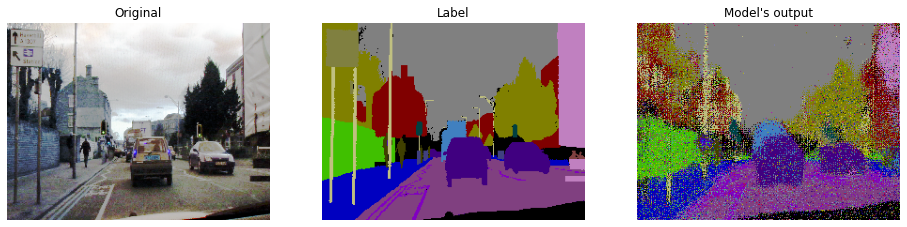

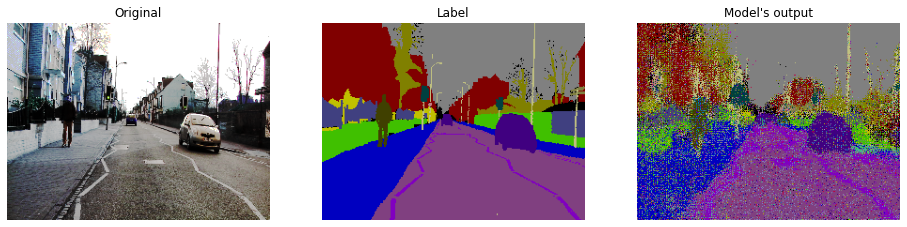

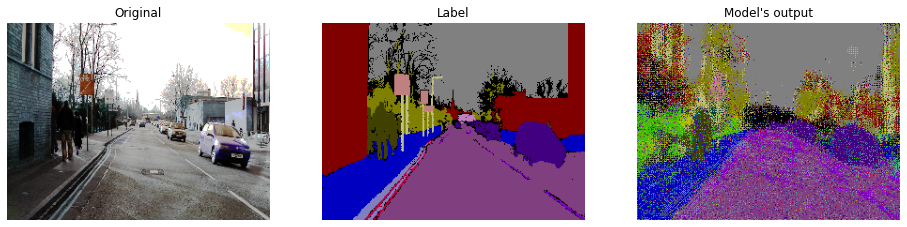

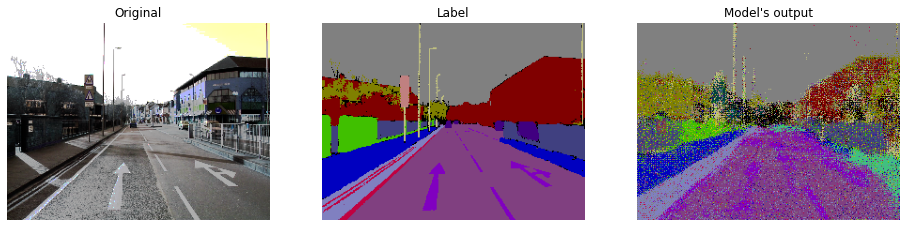

In [114]:
print('Evaluating the method on test data:')
print('Correctness:\t', np.array(correctnessesTest).mean())
for i in range(10):
    
    fig = plt.figure(figsize=(16, 10))
    ax1 = fig.add_subplot(2, 3, 1)
    ax1.axis("off")
    ax1.title.set_text('Original')
    ax2 = fig.add_subplot(2, 3, 2)
    ax2.axis("off")
    ax2.title.set_text("Label")
    ax3 = fig.add_subplot(2, 3, 3)
    ax3.axis("off")
    ax3.title.set_text("Model's output")

    ax1.imshow(np.transpose(imagesTest[i][0]/ 2 + 0.5, (1, 2, 0)), cmap=None)
    ax2.imshow(data_reader.rev_translate(np.array([labelsTest[i]])), cmap=None)
    ax3.imshow(resultsTest[i], cmap=None)
    plt.show()
#     fig.savefig('./saved_images/equalizeHistnorm.png', dpi=100)

Model without Batch Norm

In [19]:
# model_noBN = SegNetBase(NUM_INPUT_CHANNELS, NUM_OUTPUT_CHANNELS)
# NUM_EPOCHS = 30
# c = data_reader.labels_probability()
# c[c < 1e-6] = 1e-6
# class_weights = 1.0/c
# criterion = torch.nn.CrossEntropyLoss(weight = class_weights)

# optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

In [20]:
# lossesBN, t_lossesBN = train(model_noBN, criterion, optimizer, NUM_EPOCHS = NUM_EPOCHS, load = False, log = False)

In [ ]:
# plt.plot([i for i in range(len(lossesBN[:65]))], lossesBN[:65], label='Train Loss')
# plt.plot([i for i in range(len(t_lossesBN[:65]))], t_lossesBN[:65], label = 'Test Loss')
# plt.xlabel('Epochs')
# plt.ylabel('CrossEnthropy Loss')
# plt.title('SGD optimizer Moment = 0.9 & alpha = 0.04')
# plt.legend()

# plt.savefig('./saved_images/losswithoutBN.png', dpi = 400, without BN)

In [122]:
imagesTrain, labelsTrain, resultsTrain, correctnessesTrain = val(train_loader0, model_path = './model/model_best_no_BN.pth')

In [2]:
# print('Evaluating the method on train data:')
# print('Correctness:\t', np.array(correctnessesTrain).mean())

# for i in range(10):
    
#     fig = plt.figure(figsize=(16, 10))
#     ax1 = fig.add_subplot(2, 3, 1)
#     ax1.axis("off")
#     ax1.title.set_text('Original')
#     ax2 = fig.add_subplot(2, 3, 2)
#     ax2.axis("off")
#     ax2.title.set_text("Label")
#     ax3 = fig.add_subplot(2, 3, 3)
#     ax3.axis("off")
#     ax3.title.set_text("Model's output")

#     ax1.imshow(np.transpose(imagesTrain[i][0]/ 2 + 0.5, (1, 2, 0)), cmap=None)
#     ax2.imshow(data_reader.rev_translate(np.array([labelsTrain[i]])), cmap=None)
#     ax3.imshow(resultsTrain[i], cmap=None)
#     plt.show()
# #     fig.savefig('./saved_images/equalizeHistnorm.png', dpi=100)